In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Import neccessary packages
import os
import cv2
import random
import warnings
import argparse
import itertools
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook as tqdm

# import the tensorflow.keras packages
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 50

In [ ]:
# create CNN Model

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()                ## siamese networks
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        print(K.image_data_format())
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
dataset="/content/drive/MyDrive/CNN/Dataset/CNN_Train"
model= "/content/drive/MyDrive/CNN/Dataset/Scene.model"
plot=" plot.png"

In [ ]:
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(SEED)
random.shuffle(imagePaths)
imagePaths[:5]

['/content/drive/MyDrive/CNN/Dataset/CNN_Train/Sea/3840.jpg',
 '/content/drive/MyDrive/CNN/Dataset/CNN_Train/Forest/1369.jpg',
 '/content/drive/MyDrive/CNN/Dataset/CNN_Train/Sea/3691.jpg',
 '/content/drive/MyDrive/CNN/Dataset/CNN_Train/Buildings/1891.jpg',
 '/content/drive/MyDrive/CNN/Dataset/CNN_Train/Sea/1741.jpg']

In [ ]:
image=cv2.imread(imagePaths[5])
print("Shape of one image=>",image.shape)

##Resize it => deep learning models train faster on small images
image = cv2.resize(image, (28, 28))
print("Resize Shape of one image=>",image.shape)
print("Type",type(image))

##convert it to array
image = img_to_array(image)
print("Type",type(image))

Shape of one image=> (150, 150, 3)
Resize Shape of one image=> (28, 28, 3)
Type <class 'numpy.ndarray'>
Type <class 'numpy.ndarray'>


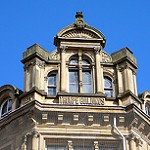

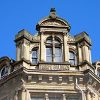

In [ ]:
from google.colab.patches import cv2_imshow
image=cv2.imread(imagePaths[5])
cv2_imshow(image)
image = cv2.resize(image,(100,100))
cv2_imshow(image)

In [ ]:
## Extract The Label From Image Path
label = imagePaths[5].split(os.path.sep)[-2]
label

'Buildings'

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar
with tqdm(total=len(imagePaths)) as pbar:
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Buildings":
            label = 0
        elif label == "Forest":
            label = 1
        elif label == "Sea":
            label = 2

        # print("pr: ", label)

        labels.append(label)

        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/1326 [00:00<?, ?it/s]

In [ ]:
#pixel values are integers that range from 0 (black) to 255 (white).
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
data.shape

(1326, 28, 28, 3)

In [ ]:
data[1][27]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
labels

array([2, 1, 2, ..., 1, 1, 2])

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=SEED)

In [ ]:
trainX.shape

(994, 28, 28, 3)

In [ ]:
trainY.shape

(994,)

In [ ]:
trainY[1]

0

In [ ]:
trainY[2]

1

In [ ]:
trainY[4]

2

In [ ]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [ ]:
trainY[1]

array([1., 0., 0.], dtype=float32)

In [ ]:
trainY[2]

array([0., 1., 0.], dtype=float32)

In [ ]:
trainY[4]

array([0., 0., 1.], dtype=float32)

Data Preprocessing (Augumentation)


In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [ ]:
EPOCHS = 200
INIT_LR = 1e-3
BS = 32

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import schedules

In [ ]:
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3)
INIT_LR = 0.001
EPOCHS = 100

learning_rate = schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=EPOCHS,
    decay_rate=0.95,
    staircase=True
)

opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] model compiled...")

[INFO] compiling model...
channels_last
[INFO] model compiled...


In [ ]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 20)        1520      
                                                                 
 activation_44 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 50)        25050     
                                                                 
 activation_45 (Activation)  (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 50)         0         
 g2D)                                                

In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS,
              verbose=1)

[INFO] training network...
Epoch 1/100
31/31 [==============================] - 6s 163ms/step - loss: 0.9643 - accuracy: 0.4948 - val_loss: 0.8351 - val_accuracy: 0.5904
Epoch 2/100
31/31 [==============================] - 3s 95ms/step - loss: 0.7000 - accuracy: 0.6933 - val_loss: 0.5273 - val_accuracy: 0.8042
Epoch 3/100
31/31 [==============================] - 3s 87ms/step - loss: 0.6532 - accuracy: 0.7089 - val_loss: 0.5556 - val_accuracy: 0.7620
Epoch 4/100
31/31 [==============================] - 4s 121ms/step - loss: 0.5431 - accuracy: 0.7744 - val_loss: 0.5050 - val_accuracy: 0.8253
Epoch 5/100
31/31 [==============================] - 4s 118ms/step - loss: 0.5705 - accuracy: 0.7609 - val_loss: 0.4816 - val_accuracy: 0.8313
Epoch 6/100
31/31 [==============================] - 3s 88ms/step - loss: 0.4877 - accuracy: 0.7994 - val_loss: 0.4561 - val_accuracy: 0.8343
Epoch 7/100
31/31 [==============================] - 3s 109ms/step - loss: 0.4962 - accuracy: 0.8046 - val_loss: 0.687

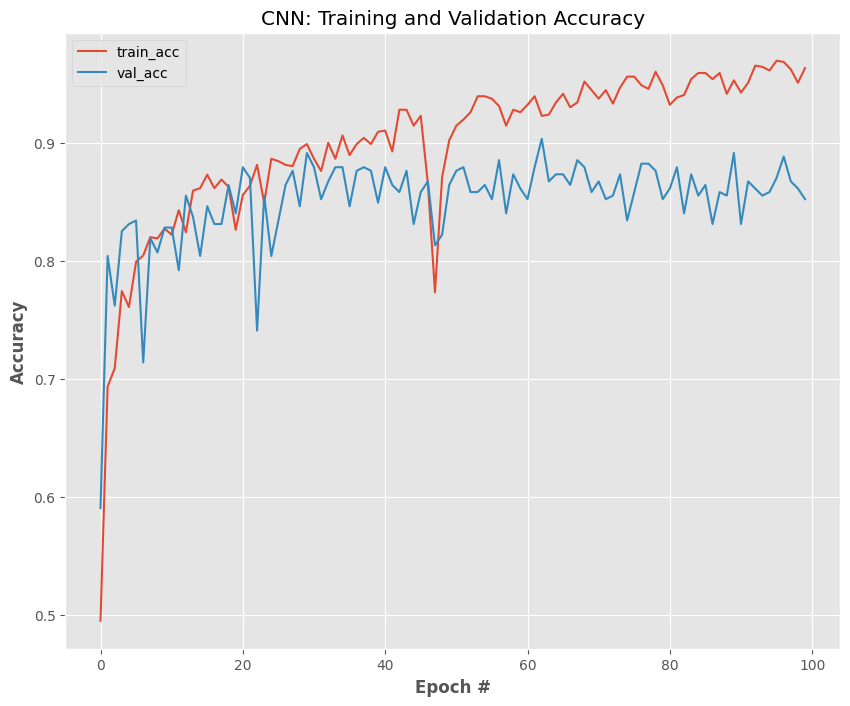

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

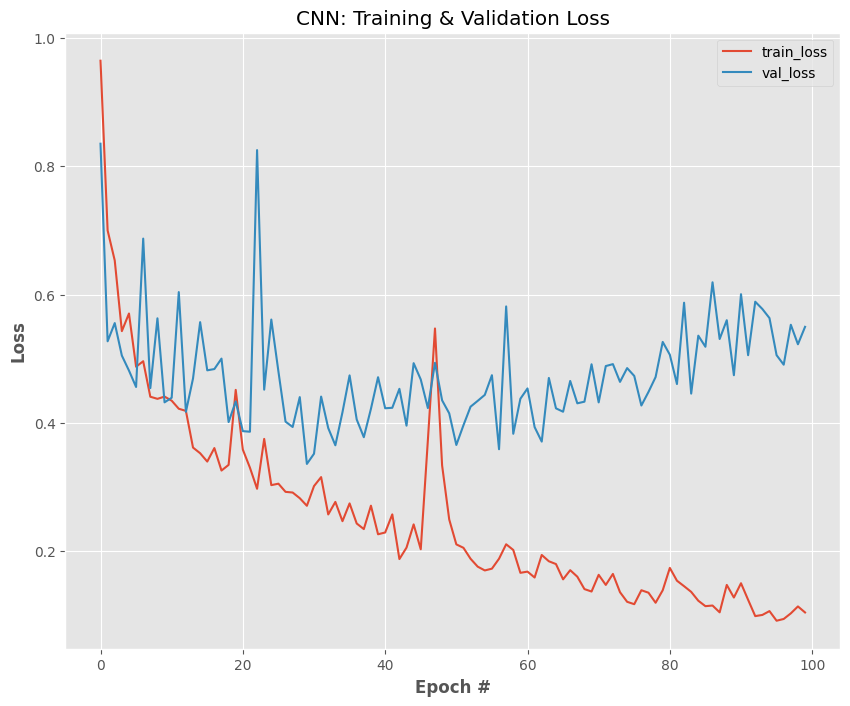

In [ ]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/CNN/Dataset/Scene.model")

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

model = load_model("/content/drive/MyDrive/CNN/Dataset/Scene_New.model")
# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/CNN/Dataset/CNN_test_examples')))   # data folder with 2 categorical folders

all_class = ["Buildings", "Forest", "Sea"]

# progress bar
with tqdm(total=len(testImagePaths)) as pbar:
    for imagePath in testImagePaths:
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf = model.predict(image)[0]

        # build the label
        label = all_class[np.argmax(prd_conf)]
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (255, 0, 0), 2)

        # convert img to rgb format and display
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        pbar.update(1)

  0%|          | 0/28 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image

    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)


    preds = model.predict(image)[0]
    result = dict()
    result["Buildings"] = round(float(list(preds)[0]), 3)
    result["Forest"] = round(float(list(preds)[1]), 3)
    result["Sea"] = round(float(list(preds)[2]), 3)

    print(result)

    return result

In [ ]:
im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="CNN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://841ed6b77c116e2db6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0
